In [ ]:
## modify these parameters
fname = 'data/3_9eq_03_02_2022_-25_005.mp4'

# set to -1 to store one image per minute
store_every = -1

# set to -1 to read all of the images
max_images_to_read = -1

In [ ]:
## don't modify below here, just execute

In [ ]:
!pwd

/home/ericdill/dev/jdm/crystal-video


In [ ]:
import pathlib
fname = pathlib.Path(fname)
if not fname.exists():
    raise RuntimeError(f"Cannot find {fname}")

In [33]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tqdm.notebook import trange, tqdm
import textwrap
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from traitlets import HasTraits, Unicode

from ipywidgets import interactive
import datetime

In [34]:
%matplotlib inline

In [35]:

vid = cv2.VideoCapture(str(fname))

fps = int(vid.get(cv2.CAP_PROP_FPS))
frame_count = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count/fps
print(f"{duration}s, {frame_count} frames, {fps} fps")

w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"{w} x {h} (w x h)")

total_time = str(datetime.timedelta(seconds=int(frame_count / fps)))
print(f"Movie duration: {total_time} (HH:MM:SS)")

1906.1538461538462s, 24780 frames, 13 fps
1920 x 1200 (w x h)
Movie duration: 0:31:46 (HH:MM:SS)


In [36]:
if max_images_to_read == -1:
    max_images_to_read = frame_count
if store_every == -1:
    store_every = fps
    
images_to_store = max_images_to_read // store_every
time_between_images = int(store_every / fps)

In [37]:
arr = np.zeros((images_to_store+1, h, w), dtype=np.uint8)

ret = True
frame = None
frame_idx = 0
store_idx = 0
print(textwrap.dedent(f"""Storing one image every {datetime.timedelta(seconds=time_between_images)} (HH:MM:SS)
in memory.
This will be {images_to_store} images out of {frame_count} total images that will be read"""))

for idx in trange(max_images_to_read-1):
    ret, frame = vid.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if idx % store_every == 0:
        arr[store_idx] = gray
        # print(f"{idx}.",end='')
        store_idx += 1

Storing one image every 0:00:01 (HH:MM:SS)
in memory.
This will be 1906 images out of 24780 total images that will be read


  0%|          | 0/24779 [00:00<?, ?it/s]

Text(0, 0.5, 'total image intensity')

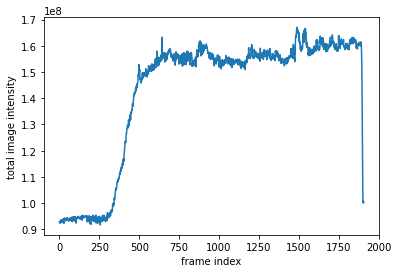

In [39]:
## Plot summed intensity over time
I = np.sum(arr, axis=(1,2))
fig, ax = plt.subplots()
lines = ax.plot(I)
ax.set_xlabel("frame index")
ax.set_ylabel("total image intensity")

In [40]:
%matplotlib widget

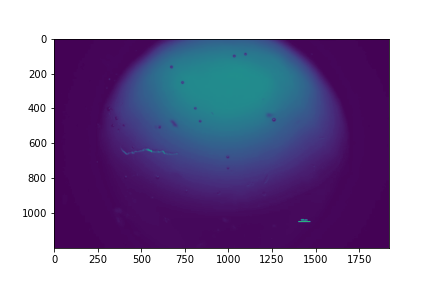

In [41]:
fig2, ax2 = plt.subplots()
def plotter_func(frame):
    ax2.clear()
    ax2.imshow(arr[frame])
    fig2.canvas.draw()
    # fig2.show()
    # plt.figure(2)
    # plt.imshow(arr[frame])
    # plt.show()
    textbox.value = str(datetime.timedelta(seconds=frame * fps))
    actual_frame.value = str(int(frame * fps))
    # fig2.

slider = widgets.IntSlider(min=0, max=len(arr)-1, step=1, value=len(arr)-1)
textbox = widgets.Text(description="HH:MM:SS")
actual_frame = widgets.Text(description="actual frame")
interactive_plot = interactive(plotter_func, frame=slider)
# out = widgets.Output()
# output = interactive_plot.children[-1]
# output.layout.height = '500px'
vbox = widgets.VBox([
    widgets.HBox([
        textbox,
        actual_frame,
    ]),
    interactive_plot
])
display(vbox)